In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Data = pd.read_csv('dataset\Anime.csv')
animeData = Data.copy()
animeData.head(n = 10)



,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,aired_from,aired_to,genre,studio,synopsis
0,52991,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,TV,28.0,9.30,1.0,142,1119371,Finished Airing,Manga,24 min per ep,2023-09-29T00:00:00+00:00,2024-03-22T00:00:00+00:00,"Adventure, Drama, Fantasy",Madhouse,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,9.10,2.0,3,3522284,Finished Airing,Manga,24 min per ep,2009-04-05T00:00:00+00:00,2010-07-04T00:00:00+00:00,"Action, Adventure, Drama, Fantasy",Bones,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,Steins;Gate,STEINS;GATE,TV,24.0,9.07,3.0,14,2697581,Finished Airing,Visual novel,24 min per ep,2011-04-06T00:00:00+00:00,2011-09-14T00:00:00+00:00,"Drama, Sci-Fi, Suspense",White Fox,Eccentric scientist Rintarou Okabe has a never...
3,38524,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10.0,9.05,4.0,21,2445236,Finished Airing,Manga,23 min per ep,2019-04-29T00:00:00+00:00,2019-07-01T00:00:00+00:00,"Action, Drama, Suspense",Wit Studio,Seeking to restore humanity's diminishing hope...
4,28977,Gintama°,Gintama Season 4,銀魂°,TV,51.0,9.05,5.0,343,667240,Finished Airing,Manga,24 min per ep,2015-04-08T00:00:00+00:00,2016-03-30T00:00:00+00:00,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,"Gintoki, Shinpachi, and Kagura return as the f..."
5,60022,One Piece Fan Letter,NaN,ONE PIECE FAN LETTER,TV Special,1.0,9.04,7.0,2115,110262,Finished Airing,Light novel,24 min,2024-10-20T00:00:00+00:00,NaN,"Action, Adventure, Fantasy",Toei Animation,Although the golden age of piracy is about to ...
6,39486,Gintama: The Final,Gintama: The Very Final,銀魂 THE FINAL,Movie,1.0,9.04,6.0,1521,169676,Finished Airing,Manga,1 hr 44 min,2021-01-08T00:00:00+00:00,NaN,"Action, Comedy, Drama, Sci-Fi",Bandai Namco Pictures,Two years have passed following the Tendoshuu'...
7,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148.0,9.03,8.0,8,3022721,Finished Airing,Manga,23 min per ep,2011-10-02T00:00:00+00:00,2014-09-24T00:00:00+00:00,"Action, Adventure, Fantasy",Madhouse,Hunters devote themselves to accomplishing haz...
8,9969,Gintama',Gintama Season 2,銀魂',TV,51.0,9.02,9.0,402,589724,Finished Airing,Manga,24 min per ep,2011-04-04T00:00:00+00:00,2012-03-26T00:00:00+00:00,"Action, Comedy, Sci-Fi",Sunrise,"After a one-year hiatus, Shinpachi Shimura ret..."
9,15417,Gintama': Enchousen,Gintama: Enchousen,銀魂' 延長戦,TV,13.0,9.02,10.0,751,345232,Finished Airing,Manga,24 min per ep,2012-10-04T00:00:00+00:00,2013-03-28T00:00:00+00:00,"Action, Comedy, Sci-Fi",Sunrise,"While Gintoki Sakata was away, the Yorozuya fo..."


In [3]:
print('Number of unique elements in each attribute:\n')

# Get number of unique values per column
for column in animeData.columns:
    unique_count = animeData[column].nunique()
    print(f"{column}: {unique_count} unique values")

print("\n" + "="*60 + "\n")


Number of unique elements in each attribute:

anime_id: 28467 unique values
name: 28460 unique values
title_english: 12001 unique values
title_japanese: 27260 unique values
type: 9 unique values
episodes: 258 unique values
rating: 569 unique values
rank: 17352 unique values
popularity: 22712 unique values
members: 12038 unique values
status: 3 unique values
source: 17 unique values
duration: 341 unique values
aired_from: 9234 unique values
aired_to: 5507 unique values
genre: 927 unique values
studio: 1850 unique values
synopsis: 23122 unique values




In [4]:
genre_counts = (
    animeData
    .dropna(subset=['genre'])
    .assign(genre=animeData['genre'].str.split(','))
    .explode('genre')
    .assign(genre=lambda df: df['genre'].str.strip())
    .groupby('genre')
    .size()
    .sort_values(ascending=False)
)

print("Anime count per genre:")
print(genre_counts)


Anime count per genre:
genre
Comedy           7688
Fantasy          5881
Action           5521
Adventure        4335
Sci-Fi           3425
Drama            3051
Romance          2162
Hentai           1564
Slice of Life    1556
Supernatural     1535
Avant Garde      1042
Mystery           983
Ecchi             819
Sports            808
Horror            577
Suspense          449
Award Winning     259
Gourmet           225
Boys Love         191
Girls Love        118
Erotica            78
dtype: int64


In [5]:
# List of genres to drop (e.g., adult content)
genres_to_drop = {'Hentai', 'Erotica', 'Ecchi', 'Boys Love', 'Girls Love'}

def contains_drop_genre(genre_str):
    if pd.isna(genre_str):
        return False
    return any(g.strip() in genres_to_drop for g in genre_str.split(','))

mask = animeData['genre'].apply(contains_drop_genre)
print(f"Number of animes to drop: {mask.sum()}")

animeData = animeData[~mask].reset_index(drop=True)




Number of animes to drop: 2685


In [6]:
animeData.isnull().sum()

anime_id              0
name                  0
title_english     14811
title_japanese      150
type                 61
episodes            528
rating             9980
rank               4909
popularity            0
members               0
status                0
source                0
duration              0
aired_from          825
aired_to          16542
genre              5918
studio            11457
synopsis           4814
dtype: int64

rank is based on the rating?right? so we can just assign some rating based on the ranking. \

see how popularity and ranking vary. since popularity has no null vals, maybe a relationship couls help us impute a  lot of other values.

we can probably just drop the english title, its mostly the same as the name afaik (verify this too)

aired_to nulls could mean its still airing? or indefinetely stopped with no updates from the author?

we are building model based on this dataset. we are not putting in efforts to make this dataset the best (atleast for now)

an empty synopsis could mean a less popular anime? empty studio?? maybe lets just drop it. genre is fine we might have to impute them with unknown tho. 

the goal is to try and keep most od the 28k anime in the final cleaned dataset.

In [7]:
pd.set_option('display.max_rows', 500)   # or None for unlimited
pd.set_option('display.max_colwidth', None)  # prevent column truncation


In [8]:
def print_top_unique_values(df, columns, top_n=10):
    for col in columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False).head(top_n))

columns_to_check = animeData.columns.tolist()

print_top_unique_values(animeData, columns_to_check, top_n=150)




--- anime_id ---
anime_id
51156    1
52991    1
5114     1
9253     1
38524    1
28977    1
9498     1
9518     1
9533     1
9536     1
9540     1
9546     1
9562     1
9606     1
23779    1
9749     1
9797     1
9807     1
9811     1
9812     1
9819     1
9825     1
263      1
40028    1
31758    1
37510    1
55255    1
36838    1
49387    1
59571    1
32281    1
40682    1
37987    1
58514    1
35247    1
51535    1
54492    1
37491    1
55016    1
21       1
50160    1
45649    1
2921     1
52198    1
1        1
51009    1
47917    1
55690    1
58567    1
48583    1
17074    1
199      1
37521    1
32935    1
40434    1
245      1
33352    1
21939    1
44       1
1575     1
33095    1
53998    1
50172    1
52215    1
47778    1
48569    1
44074    1
24701    1
39894    1
53223    1
35760    1
11665    1
34599    1
23273    1
46102    1
2001     1
50399    1
457      1
49413    1
33050    1
58125    1
164      1
431      1
5258     1
56784    1
57864    1
7311     1
38329    1
4565 

for synopsis,
NaN                                                                                                                                           
No synopsis has been added for this series yet.\n\nClick here to update this information....

same name -  diff anime_id,there are 7 animes with 2 columns with same name

Members has 0 vals, but ig thats possible?
rank and popularity 0 ?? and animes with same rank? how do rank and popularity have duplicate values? shouldnt they be unique? or do diff animes have same ranks?
the same datapoints might have rank, popularity and members as 0, total 225

aired_from and aired_to, might not have full inof about which day and month so they couldve been assigned the reigth year but 1st of Jan

duration and source have 'Unknown'.


episodes have 1 value points, a little sus, but ig many movies and OVAs could just have 1 episode




In [9]:
print("Popularity == 0:", (animeData['popularity'] == 0).sum())
print("Members == 0:", (animeData['members'] == 0).sum())
print("Rank == 0:", (animeData['rank'] == 0).sum())


triple_zero = animeData[
    (animeData['popularity'] == 0) &
    (animeData['members'] == 0) &
    (animeData['rank'] == 0)
]
print("All three == 0:", len(triple_zero))


Popularity == 0: 222
Members == 0: 223
Rank == 0: 222
All three == 0: 222


In [10]:
# triple_zero.head(n=225)
animeData = animeData[
    ~(
        (animeData['popularity'] == 0) &
        (animeData['members'] == 0) &
        (animeData['rank'] == 0)
    )
].reset_index(drop=True)


Stopping here

re-run the notebook from start
u dropped some useless anime-225. u wanna recheck nulls and then go on to impute.

u might impute strings to unknown, for now? 
once eda is done upload it to kaggle

also replace the placeholders.

In [11]:
from dateutil import parser

def extract_year(date_str):
    if pd.isna(date_str):
        return np.nan
    try:
        return parser.parse(date_str).year
    except:
        return np.nan

animeData['aired_from_year'] = animeData['aired_from'].apply(extract_year)
animeData['aired_to_year'] = animeData['aired_to'].apply(extract_year)

# Optionally, drop original columns
animeData.drop(columns=['aired_from', 'aired_to'], inplace=True)

In [12]:
placeholder_mask = animeData['synopsis'].str.startswith("No synopsis has been added for this series yet", na=False)
print("Total rows with placeholder:", placeholder_mask.sum())

placeholders = animeData.loc[placeholder_mask, 'synopsis'].unique()

for i, val in enumerate(placeholders):
    print(f"[{i}] Length: {len(val)}\n{val}\n{'='*80}")



Total rows with placeholder: 22
[0] Length: 90
No synopsis has been added for this series yet.

Click here to update this information....
[1] Length: 91
No synopsis has been added for this series yet. 

Click here to update this information....
[2] Length: 50
No synopsis has been added for this series yet....


In [13]:
animeData['synopsis'] = animeData['synopsis'].apply(
    lambda x: np.nan if isinstance(x, str) and x.startswith("No synopsis has been added for this series yet") else x
)

In [14]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      14655
title_japanese       112
type                  56
episodes             513
rating              9758
rank                4909
popularity             0
members                0
status                 0
source                 0
duration               0
genre               5820
studio             11240
synopsis            4796
aired_from_year      818
aired_to_year      16336
dtype: int64

anime_id              0
name                  0
type                 67
episodes            612
rating            10046
rank               6592
popularity            0
members               0
status                0
source                0
duration              0
aired_from          843
genre              5918
studio            11673
synopsis           5051
dtype: int64
drop english and japanese titles, aired_to -  no use
type, nulls? - impute with unknown


In [15]:
columns_to_check = animeData.columns.tolist()
print_top_unique_values(animeData, columns_to_check, top_n=150)



--- anime_id ---
anime_id
51156    1
52991    1
5114     1
9253     1
38524    1
28977    1
60022    1
39486    1
9498     1
9518     1
9533     1
9536     1
9540     1
9546     1
9562     1
9606     1
23779    1
9749     1
9797     1
9807     1
9811     1
9812     1
9819     1
9825     1
37521    1
32935    1
263      1
40028    1
31758    1
37510    1
55255    1
36838    1
49387    1
59571    1
32281    1
40682    1
37987    1
58514    1
35247    1
51535    1
39894    1
53223    1
55016    1
21       1
50160    1
45649    1
2921     1
52198    1
1        1
51009    1
47917    1
55690    1
58567    1
48583    1
17074    1
199      1
56784    1
57864    1
40434    1
245      1
33352    1
21939    1
44       1
1575     1
33095    1
53998    1
50172    1
52215    1
47778    1
48569    1
44074    1
24701    1
40591    1
54898    1
35760    1
11665    1
34599    1
23273    1
46102    1
2001     1
50399    1
457      1
49413    1
33050    1
58125    1
164      1
431      1
5258     1
52034

In [16]:
rating_rank = animeData[(animeData['rating'].isna()) & (animeData['rank'].isna())]
print("Rows with NaN rating and rank:", len(rating_rank))
rating_rank.head(n=10)

Rows with NaN rating and rank: 2146


,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year
15799,61731,Gakkou de wa Oshiete Kurenai Taisetsu na Koto,NaN,学校では教えてくれない大切なこと,TV,NaN,NaN,NaN,28421,0,Not yet aired,Book,Unknown,Comedy,Imagica Infos,"Unique and reliable ""experts"" appear before elementary school students who are struggling with issues such as ""I'm not good at tidying up,"" ""I keep putting off my homework because I'm so obsessed with games,"" and ""My grades aren't improving as much as I'd like,"" and provide passionate instruction to teach them important things that they should learn but that they won't learn at school.\n\n(Source: MANTANWEB, translated)...",2025.0,NaN
15801,61440,Watashi no Shiawase na Kekkon (Shinsaku Anime),NaN,わたしの幸せな結婚 新作アニメ,NaN,NaN,NaN,NaN,6276,12349,Not yet aired,Novel,Unknown,"Drama, Fantasy, Romance",NaN,New anime project of Watashi no Shiawase na Kekkon....,NaN,NaN
15802,61349,"PlayStation x YOASOBI ""Players"" 30-shuunen Tokubetsu CM","PlayStation x YOASOBI ""Players"" 30th Anniversary Special CM",PlayStation® × YOASOBI「PLAYERS」30周年特別CM,CM,1.0,NaN,NaN,23131,150,Finished Airing,Original,2 min,"Action, Sci-Fi",NaN,"The 30th anniversary special video using the original song Player by YOASOBI, born from the 30th anniversary project Project: Memory Card for the release of the original PlayStation.\n\n(Source: Youtube, translated)...",2025.0,NaN
15804,61435,Kaiten Mokuba,NaN,回転木馬,Music,1.0,NaN,NaN,28258,54,Finished Airing,Original,4 min,NaN,NaN,Music video for the song Kaiten Mokuba by Tamurapan....,2007.0,NaN
15805,61375,A Day In Autumn,NaN,A DAY IN AUTUMN,Music,1.0,NaN,NaN,28061,65,Finished Airing,Original,7 min,NaN,Gainax,Music video for the song A Day In Autumn by Tomosayu Hotei....,1989.0,NaN
15806,61374,Dancing with the Moonlight,NaN,DANCING WITH THE MOONLIGHT,Music,1.0,NaN,NaN,28259,54,Finished Airing,Original,5 min,NaN,Gainax,Music video for the song Dancing with the Moonlight by Tomoyasu Hotei....,1989.0,NaN
15807,61425,Ponkotsu Fuuki Iin to Skirt-take ga Futekisetsu na JK no Hanashi,NaN,ポンコツ風紀委員とスカート丈が不適切なJKの話,TV,NaN,NaN,NaN,13701,1234,Not yet aired,Manga,Unknown,"Comedy, Romance",Zero-G,"Sakuradaimon takes his role on the school's Public Morals Committee very seriously. Every day, he dutifully checks students' appearances at the school gate—most often scolding Kohinata, a rule-breaking girl with bright hair and a short skirt.\n\nThough she finds his constant lecturing annoying, everything changes when she discovers that Sakuradaimon is actually a bit of a mess himself.\n\nA lighthearted short romantic comedy about a strict committee member, a bold classmate, and the chaotic school l...",NaN,NaN
15809,61419,Obeka,NaN,おべか,Music,1.0,NaN,NaN,28184,58,Finished Airing,Original,3 min,NaN,NaN,Music video for the song Obeka by Surii featuring Kasane Teto and Kagamine Len....,2024.0,NaN
15810,61418,Kusunoki no Bannin,The Keeper of the Camphor Tree,クスノキの番人,Movie,1.0,NaN,NaN,15740,711,Not yet aired,Novel,Unknown,NaN,A-1 Pictures,"If you knew you didn't have long to live, who would you tell? What would you say? And how would you deliver the message?\n\nThe Keeper of the Camphor Tree starts with Reito Naoi, a man in his early 20s, being unjustly fired from his job. Enraged and fueled by feelings of revenge, he tries to steal a valuable device from his workplace, but things don't go to plan, and he ends up arrested.\n\nIn jail, Reito is paid an unexpected visit by a lawyer who offers to arrange for his release, if he complies w...",2026.0,NaN
15811,61416,Wo Jide,Teen on Shuqian Street,我记得,Music,1.0,NaN,NaN,28281,52,Finished Airing,Original,5 min,NaN,NaN,Music video for the song Wo Jide by Zhao Lei....,2022.0,NaN


In [17]:
import re


def parse_duration(duration_str):
    if not isinstance(duration_str, str):
        return np.nan

    duration_str = duration_str.lower().strip()
    
    if "unknown" in duration_str or duration_str == "":
        return np.nan

    # Regex patterns
    hr = re.search(r'(\d+)\s*hr', duration_str)
    mins = re.findall(r'(\d+)\s*min', duration_str)
    secs = re.search(r'(\d+)\s*sec', duration_str)

    total_minutes = 0

    if hr:
        total_minutes += int(hr.group(1)) * 60

    if mins:
        total_minutes += int(mins[-1])  # Use last minute match

    if secs:
        total_minutes += int(secs.group(1)) / 60  # Add fractional mins

    return round(total_minutes, 2) if total_minutes > 0 else np.nan


animeData['duration_mins'] = animeData['duration'].apply(parse_duration)


In [18]:
print(animeData[['duration', 'duration_mins']].head(15))


         duration  duration_mins
0   24 min per ep           24.0
1   24 min per ep           24.0
2   24 min per ep           24.0
3   23 min per ep           23.0
4   24 min per ep           24.0
5          24 min           24.0
6     1 hr 44 min          104.0
7   23 min per ep           23.0
8   24 min per ep           24.0
9   24 min per ep           24.0
10  26 min per ep           26.0
11  24 min per ep           24.0
12  24 min per ep           24.0
13  23 min per ep           23.0
14  23 min per ep           23.0


In [19]:
len(animeData['duration_mins'].unique())


208

In [20]:
duration_mapping = (
    animeData
    .dropna(subset=['duration'])  # ignore missing durations
    .drop_duplicates(subset=['duration'])[['duration', 'duration_mins']]
    .sort_values(by='duration_mins', na_position='last')
)

print(duration_mapping.to_string(index=False))


          duration  duration_mins
             3 sec           0.05
      6 sec per ep           0.10
             7 sec           0.12
      7 sec per ep           0.12
            10 sec           0.17
     10 sec per ep           0.17
            12 sec           0.20
     12 sec per ep           0.20
            13 sec           0.22
            14 sec           0.23
     14 sec per ep           0.23
            15 sec           0.25
     15 sec per ep           0.25
     16 sec per ep           0.27
            16 sec           0.27
            17 sec           0.28
            18 sec           0.30
     18 sec per ep           0.30
     19 sec per ep           0.32
            19 sec           0.32
            20 sec           0.33
     20 sec per ep           0.33
     21 sec per ep           0.35
            21 sec           0.35
            22 sec           0.37
     22 sec per ep           0.37
            23 sec           0.38
     23 sec per ep           0.38
            24

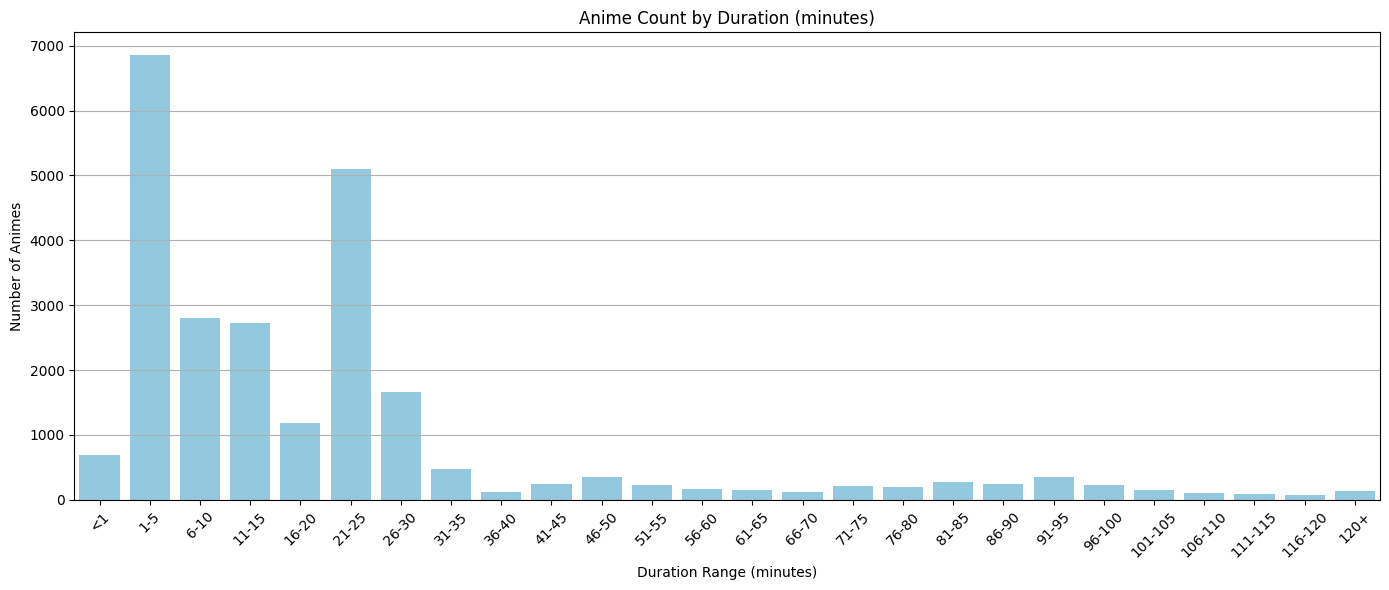

In [21]:
bin_edges = [0, 1] + list(range(5, 125, 5)) + [float('inf')]
# There are 26 bins, so we need 26 labels
bin_labels = ['<1'] + [f"{i}-{i+4}" for i in range(1, 121, 5)] + ['120+']

animeData['duration_bucket'] = pd.cut(animeData['duration_mins'], 
                                       bins=bin_edges,
                                       labels=bin_labels,
                                       right=False)

plt.figure(figsize=(14, 6))
sns.countplot(data=animeData, x='duration_bucket', order=bin_labels, color='skyblue')
plt.title("Anime Count by Duration (minutes)")
plt.xlabel("Duration Range (minutes)")
plt.ylabel("Number of Animes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
# Duration-based subsets
less_than_1_min = animeData[animeData['duration_mins'] < 1]
between_1_and_5_min = animeData[(animeData['duration_mins'] >= 1) & (animeData['duration_mins'] <= 5)]
between_6_and_10_min = animeData[(animeData['duration_mins'] >= 6) & (animeData['duration_mins'] <= 10)]
between_11_and_15_min = animeData[(animeData['duration_mins'] >= 11) & (animeData['duration_mins'] <= 15)]
# Print type distributions
print("--- Types for Duration < 1 min ---")
print(less_than_1_min['type'].value_counts())

print("\n--- Types for Duration 1–5 min ---")
print(between_1_and_5_min['type'].value_counts())

print("\n--- Types for Duration 6–10 min ---")
print(between_6_and_10_min['type'].value_counts())

print("\n--- Types for Duration 11–15 min ---")
print(between_11_and_15_min['type'].value_counts())


--- Types for Duration < 1 min ---
type
CM            286
ONA           196
PV             68
Special        67
TV             45
Movie          22
Music          10
TV Special      3
OVA             1
Name: count, dtype: int64

--- Types for Duration 1–5 min ---
type
Music         3573
ONA           1637
TV            1030
Movie          688
Special        628
PV             162
CM             154
TV Special     113
OVA            106
Name: count, dtype: int64

--- Types for Duration 6–10 min ---
type
ONA           610
TV            604
Movie         533
Special       180
OVA           122
Music          98
TV Special     18
PV             10
CM              8
Name: count, dtype: int64

--- Types for Duration 11–15 min ---
type
TV            1450
ONA            407
OVA            297
Movie          260
Special        145
TV Special      19
Music            6
CM               2
PV               2
Name: count, dtype: int64


In [23]:
between_1_and_5_min[(between_1_and_5_min['type'] == 'Movie')].head(n=10) 

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
1713,41590,Re:Zero kara Hajimeru Isekai Seikatsu - Hyouketsu no Kizuna - Manner Movie,Re:ZERO -Starting Life in Another World- The Frozen Bond: Manner Movie,Re:ゼロから始める異世界生活 氷結の絆 マナームービー,Movie,1.0,7.56,1749.0,3421,48900,Finished Airing,Light novel,3 min,Fantasy,Studio PuYUKAI,A manner movie shown before Re:Zero kara Hajimeru Isekai Seikatsu - Hyouketsu no Kizuna....,2019.0,NaN,3.0,1-5
1883,39921,Re:Zero kara Hajimeru Isekai Seikatsu - Memory Snow - Manner Movie,Re:ZERO -Starting Life in Another World- Memory Snow: Manner Movie,Re:ゼロから始める異世界生活 Memory Snow マナームービー,Movie,1.0,7.52,1931.0,3197,55164,Finished Airing,Light novel,3 min,Fantasy,Studio PuYUKAI,"Subaru Natsuki finally gets to take a breather, but he does not waste any time as he prepares for a date with his beloved Emilia. He scouts the nearby village for the right dating spot, and with the help of the village children, he finds a wonderful location. With that, he is well prepared for his date! Unfortunately for Subaru, cold weather suddenly sweeps across Roswaal's mansion on his important day, leaving him with no choice but to postpone the date. Overnight, it becomes even colder and un...",2018.0,NaN,3.0,1-5
3638,32153,Mahou Shoujo Madoka★Magica: Concept Movie,Puella Magi Madoka Magica Concept Movie,魔法少女まどか★マギカ コンセプトムービー,Movie,1.0,7.15,3668.0,4349,30538,Finished Airing,Original,4 min,"Drama, Suspense",Shaft,"Contemplating the meaning of happiness, Madoka Kaname and Homura Akemi compose possible answers that lead them to reflect on their own choices. Meanwhile, strange occurrences cause turmoil among the magical girls as they navigate the challenges of their destiny.\n\n[Written by MAL Rewrite]...",2015.0,NaN,4.0,1-5
4014,2386,One Piece: Yume no Soccer Ou!,One Piece: Dream Soccer King,ワンピース 夢のサッカー王!,Movie,1.0,7.08,4084.0,3446,48159,Finished Airing,Manga,5 min,"Comedy, Fantasy, Sports",Toei Animation,Luffy and his crew take on the Villain All-Stars in a game of soccer in order to become the Dream Soccer King. The game comes down to a pk tie-breaker shoot-out with Coby as goalie and Helmeppo refereeing.\n\n(Source: ANN)...,2002.0,NaN,5.0,6-10
4601,40298,Youjo Senki Movie: Manner Eizou,Saga of Tanya the Evil: The Movie - Manner Movie,劇場版 幼女戦記 マナー映像,Movie,1.0,6.95,4649.0,4950,22835,Finished Airing,Light novel,2 min,Comedy,Studio PuYUKAI,"A manner movie aired before the Youjo Senki Movie. Done in the chibi art style of Youjo Shenki and Isekai Quartet, Tanya and her battalion tell the viewers to refrain from improper theater etiquette such as using phones during the film, talking, and smoking. The manner movie was later included on the DVD/BD release of the film....",2019.0,NaN,2.0,1-5
4603,2490,One Piece: Mezase! Kaizoku Yakyuu Ou,One Piece: Take Aim! The Pirate Baseball King,ワンピース めざせ！海賊野球王,Movie,1.0,6.95,4670.0,3897,38642,Finished Airing,Manga,5 min,"Comedy, Fantasy, Sports",Toei Animation,Luffy and crew takes on Arlong's crew in baseball. Announced by Bon Clay and Buggy.\n\n(Source: ANN)...,2004.0,NaN,5.0,6-10
4876,37860,Free! Take Your Marks: Character Butai Aisatsu,NaN,特別版 Free!-Take Your Marks- キャラクター舞台挨拶,Movie,4.0,6.89,4940.0,7684,7511,Finished Airing,Original,5 min per ep,Comedy,Kyoto Animation,Character Stage Greeting Manner Special's shown before main movie. Later included on the movie Blu-ray and DVD release....,2017.0,NaN,5.0,6-10
5034,41052,Osomatsu-san Movie: Zensetsu Gekijou,Mr. Osomatsu-san the Movie: Prologue Theater,えいがのおそ松さん 前説劇場,Movie,6.0,6.86,5122.0,11245,2561,Finished Airing,Manga,2 min per ep,Comedy,NaN,Osomatsu-san Movie shorts shown weekly in theaters and later included in DVD/BD release. In them the boys break the fourth wall worrying about their own film being released....,2019.0,2019.0,2.0,1-5
5074,37858,Free! Movie 1: Timeless Medley - Kizuna - Character But

anything less than 5 mins, except music - dropped
music less than 1- dropped

In [24]:
# Create a boolean mask for rows to drop:
# - duration < 5 mins and type is not 'Music'
# - duration < 1 min and type is 'Music'
drop_mask = (
    ((animeData['duration_mins'] < 5) & (animeData['type'] != 'Music')) |
    ((animeData['type'] == 'Music') & (animeData['duration_mins'] < 1))
)

drop_indices = animeData[drop_mask].index
print(f"Number of rows to drop: {len(drop_indices)}")

Number of rows to drop: 4223


In [25]:
animeData = animeData.drop(index=drop_indices).reset_index(drop=True)

In [26]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      11790
title_japanese        76
type                  56
episodes             411
rating              8235
rank                4241
popularity             0
members                0
status                 0
source                 0
duration               0
genre               5215
studio              9195
synopsis            4115
aired_from_year      752
aired_to_year      13904
duration_mins        667
duration_bucket      667
dtype: int64

AIRED FROM, AIRED TO AND EPISODES(HAS TO BE MLTIPLE)

WE CAN FIND AN AVG TIME BW EP

MULTIPLY NO OF EPS AND AVG TIME AND ADD THAT TOO AIRED FROM TO GET AIRED TO

IMPUTE LARGE VALUE FOR NULLS EVEN AFTER THIS -  ONLY IF IT HAS THE STATUS SET TO STILL AIRING

In [27]:
epnull = animeData[animeData['episodes'].isna()]
epnull.head(n=10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
33,55255,Alien Stage,Alien Stage,ALIEN STAGE (에일리언스테이지),Music,NaN,8.80,NaN,7501,7963,Currently Airing,Music,3 min,"Drama, Sci-Fi, Suspense",LICO,"Humans once lived like Earth was the center of the universe. Some people embraced religion and believed that God would deliver them from suffering. After humanity was enslaved by aliens, no one spoke of God any longer.\n\nNow the grim truth is that humans are mere property of aliens. Recently, entering pet humans into the entertainment industry has become popular, and the biggest, most thrilling spectacle is known as Alien Stage. In this reality singing competition, alien sponsors flaunt their inv...",2022.0,NaN,3.0,1-5
52,21,One Piece,One Piece,ONE PIECE,TV,NaN,8.73,51.0,17,2530348,Currently Airing,Manga,24 min,"Action, Adventure, Fantasy",Toei Animation,"Barely surviving in a barrel after passing through a terrible whirlpool at sea, carefree Monkey D. Luffy ends up aboard a ship under attack by fearsome pirates. Despite being a naive-looking teenager, he is not to be underestimated. Unmatched in battle, Luffy is a pirate himself who resolutely pursues the coveted One Piece treasure and the King of the Pirates title that comes with it.\n\nThe late King of the Pirates, Gol D. Roger, stirred up the world before his death by disclosing the whereabouts...",1999.0,NaN,24.0,21-25
153,60988,Tian Guan Cifu Short Film,Heaven Official's Blessing Short Film,天官賜福 短片,ONA,NaN,8.47,154.0,7834,7175,Currently Airing,Web novel,8 min,"Action, Adventure, Drama, Fantasy",NaN,"A short film celebrating the fourth anniversary of the donghua's releases, highlighting Hua Cheng's and Xie Lian's first encounter....",2025.0,NaN,8.0,6-10
363,47794,MILGЯAM,MILGRAM,ミルグラム,Music,NaN,8.23,NaN,6337,12034,Currently Airing,Other,4 min,Suspense,OTOIRO,"Es awakens in the facility Milgram to find a strange talking animal named Jackalope staring them down. Soon, they learn their purpose: as the prison guard, Es must delve into the psyches of 10 inmates, each of them imprisoned for causing the loss of life in some form or another. Their fates rest in Es' hands. Do the means justify an end, and how much does intent matter if the result is death? No matter how the lines between good and evil, right and wrong, and just and cruel are blurred, there ar...",2020.0,NaN,4.0,1-5
452,235,Meitantei Conan,Case Closed,名探偵コナン,TV,NaN,8.17,441.0,700,365899,Currently Airing,Manga,24 min,"Adventure, Comedy, Mystery",TMS Entertainment,"Shinichi Kudou, a high school student of astounding talent in detective work, is well known for having solved several challenging cases. One day, when Shinichi spots two suspicious men and decides to follow them, he inadvertently becomes witness to a disturbing illegal activity. Unfortunately, he is caught in the act, so the men dose him with an experimental drug formulated by their criminal organization, leaving him to his death. However, to his own astonishment, Shinichi lives to see another d...",1996.0,NaN,24.0,21-25
636,59953,Mushen Ji,Tales of Herding Gods,牧神记,ONA,NaN,8.01,658.0,6059,13516,Currently Airing,Novel,20 min,"Action, Adventure, Fantasy",Sparkly Key Animation Studio,"In the Disabled Elderly Village, there live nine elderly people with unpredictable origins and the young man Qin Mu they raised. One day, the cows that Qin Mu was responsible for grazing began to speak human words. From then on, Qin Mu became more aware of the dangers and beauty of Daxu, a land abandoned by gods: demons descended with darkness, divine bones danced in the ruins, and dragon bones protected their young, a giant ship that drags the sun... No matter what kind of danger he faces, Qin ...",2024.0,NaN,20.0,21-25
1080,59828,Shoushimin Series 2nd Season,Shoshimin: How to Become Ordinary Season 2,小市民シリーズ 第2期,TV,NaN,7.77,1133.0,4203,33212

In [28]:
epnull_ = epnull[epnull['status'].isin(['Finished Airing'])]
epnull_.head(n=1)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
5176,50898,Shen Wu Tianzun,The Legend of Sky Lord,神武天尊,ONA,NaN,6.78,5524.0,14630,958,Finished Airing,Manga,10 min,"Action, Fantasy",NaN,"I came from the void. With my hands, I can make the heavens fall and the netherworld crumble. I am a demon, a god, a deity, a human. I am Xiao Chen, the lord of all things.\n\n(Source: IQIYI)...",2020.0,2024.0,10.0,11-15


In [29]:
len(epnull)

411

In [30]:
nosyn = animeData[animeData['synopsis'].isna()]

nosyn.head(10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
709,58143,Aishang Ta de Liyou Extra,The Girl Downstairs Extra,爱上她的理由,ONA,1.0,7.95,730.0,7686,7498,Finished Airing,Web manga,10 min,Romance,Red Dog Culture House,NaN,2024.0,NaN,10.0,11-15
748,53499,Aikatsu! 10th Story: Mirai e no Starway (2023),NaN,アイカツ！ 10th STORY ～未来へのSTARWAY～,Movie,1.0,7.93,775.0,11065,2690,Finished Airing,Original,48 min,NaN,Bandai Namco Pictures,NaN,2023.0,NaN,48.0,46-50
781,59939,Tunshi Xingkong Movie: Xueluo Dalu,Swallowed Star: Blood Luo Continent,吞噬星空剧场版 血洛大陆,ONA,1.0,7.91,805.0,12965,1511,Finished Airing,Novel,1 hr 33 min,"Action, Adventure, Fantasy, Sci-Fi",Sparkly Key Animation Studio,NaN,2024.0,NaN,93.0,91-95
883,57183,Wu Dong Qian Kun 4th Season,Martial Universe 4th Season,武动乾坤 第四季,ONA,12.0,7.86,926.0,11367,2468,Finished Airing,Novel,24 min per ep,"Action, Adventure, Fantasy",DC Impression Vision,NaN,2023.0,2023.0,24.0,21-25
1101,40814,Seitokai Yakuindomo Movie 2,NaN,劇場版 生徒会役員共 2,Movie,1.0,7.77,1133.0,4070,35204,Finished Airing,4-koma manga,1 hr 19 min,Comedy,GoHands,NaN,2021.0,NaN,79.0,76-80
1275,58555,You Shou Yan 3rd Season,Fabulous Beasts 3rd Season,有兽焉 第三季,ONA,12.0,7.69,1338.0,16378,615,Finished Airing,Manga,6 min per ep,"Comedy, Fantasy",Fenz,NaN,2024.0,2024.0,6.0,6-10
1306,39619,BanG Dream! Film Live,NaN,BanG Dream! FILM LIVE,Movie,1.0,7.68,1350.0,5938,14211,Finished Airing,Mixed media,1 hr 12 min,NaN,SANZIGEN,NaN,2019.0,NaN,72.0,71-75
1345,59245,Cang Yuan Tu: Dongning Fu Fanwai Pian,The Demon Hunter: Dongning Mansion Special,沧元图 东宁府番外篇,ONA,4.0,7.66,1417.0,13318,1365,Finished Airing,Web novel,23 min per ep,"Action, Adventure, Fantasy",NaN,NaN,2024.0,2024.0,23.0,21-25
1433,55692,Feng Ling Yu Xiu 2nd Season,Soulmate Adventure Season 2,风灵玉秀 第二章,ONA,12.0,7.63,1514.0,11997,2050,Finished Airing,Original,25 min per ep,"Action, Adventure",Sunflowers,NaN,2023.0,2023.0,25.0,26-30
1655,59385,You Shou Yan 4th Season,Fabulous Beasts 4th Season,有兽焉 第四季,ONA,12.0,7.56,1765.0,16714,569,Finished Airing,Original,6 min per ep,"Comedy, Fantasy",Fenz,NaN,2024.0,2024.0,6.0,6-10


In [31]:
# Get rows where both synopsis and genre are null
both_null = animeData[(animeData['synopsis'].isna()) & (animeData['genre'].isna())]
print(f"\nAnime with both synopsis and genre missing:")
print(both_null[['anime_id', 'name']])
# Count where genre is null but synopsis is not
genre_null = animeData[(animeData['synopsis'].notna()) & (animeData['genre'].isna())]
print(f"Genre null but synopsis exists: {len(genre_null)}")

# Count where synopsis is null but genre is not 
synopsis_null = animeData[(animeData['synopsis'].isna()) & (animeData['genre'].notna())]
print(f"Synopsis null but genre exists: {len(synopsis_null)}")

# Count where both are null
both_null_count = len(both_null)
print(f"Both synopsis and genre null: {both_null_count}")


Anime with both synopsis and genre missing:
       anime_id                                            name
748       53499  Aikatsu! 10th Story: Mirai e no Starway (2023)
1306      39619                           BanG Dream! Film Live
3342      41939                                         Halzion
3592      49964                                    Gunjou Sanka
3662      52993         Aikatsu! 10th Story: Mirai e no Starway
...         ...                                             ...
21194     49965   Xiongmao Sanbao: Meng Chong Weishi 2nd Season
21196     49968                       Pai Le Meng Qi 2nd Season
21197     49970                     Shuo Guo Lei Lei 2nd Season
21198     49971                      Qi Qi Ping Ping 2nd Season
21280     50377        My Melody no Ookami-san ni Ki wo Tsukete

[1475 rows x 2 columns]
Genre null but synopsis exists: 3740
Synopsis null but genre exists: 2640
Both synopsis and genre null: 1475


In [32]:
animeData['episodes'] = pd.to_numeric(animeData['episodes'], errors='coerce')

# Group by 'type' and calculate the mean of 'episodes'
mean_episodes = animeData.groupby('type')['episodes'].mean().sort_values(ascending=False)

print("Mean number of episodes for each anime type:")
print("=" * 50)
for anime_type, mean_val in mean_episodes.items():
    print(f"{anime_type:12}: {mean_val:.2f} episodes")

Mean number of episodes for each anime type:
TV          : 39.71 episodes
ONA         : 18.50 episodes
OVA         : 2.46 episodes
CM          : 1.95 episodes
Special     : 1.91 episodes
TV Special  : 1.86 episodes
Music       : 1.13 episodes
Movie       : 1.04 episodes
PV          : 1.00 episodes


In [33]:
# For non-TV types, impute episodes with the mean rounded to nearest integer
for anime_type in mean_episodes.index:
    if anime_type != 'TV':
        mask = (animeData['type'] == anime_type) & (animeData['episodes'].isna()) & (animeData['status'] != 'Not yet aired')
        animeData.loc[mask, 'episodes'] = round(mean_episodes[anime_type])
# For TV type, impute episodes using the formula: (2025-aired_from)*85/5200


In [34]:
# For TV type, impute episodes using the formula: (2025-aired_from)*85/5200
tv_mask = (animeData['type'] == 'TV') & (animeData['episodes'].isna()) & (animeData['status'] != 'Not yet aired')
animeData.loc[tv_mask, 'episodes'] = ((2025 - animeData.loc[tv_mask, 'aired_from_year']) * 85 / 5200).round()


In [35]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      11790
title_japanese        76
type                  56
episodes             321
rating              8235
rank                4241
popularity             0
members                0
status                 0
source                 0
duration               0
genre               5215
studio              9195
synopsis            4115
aired_from_year      752
aired_to_year      13904
duration_mins        667
duration_bucket      667
dtype: int64

In [36]:
len(animeData[animeData['episodes'].isna() & (animeData['status'] == 'Not yet aired')])

321

In [37]:
animeData[animeData['synopsis'].isna()].head(10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
709,58143,Aishang Ta de Liyou Extra,The Girl Downstairs Extra,爱上她的理由,ONA,1.0,7.95,730.0,7686,7498,Finished Airing,Web manga,10 min,Romance,Red Dog Culture House,NaN,2024.0,NaN,10.0,11-15
748,53499,Aikatsu! 10th Story: Mirai e no Starway (2023),NaN,アイカツ！ 10th STORY ～未来へのSTARWAY～,Movie,1.0,7.93,775.0,11065,2690,Finished Airing,Original,48 min,NaN,Bandai Namco Pictures,NaN,2023.0,NaN,48.0,46-50
781,59939,Tunshi Xingkong Movie: Xueluo Dalu,Swallowed Star: Blood Luo Continent,吞噬星空剧场版 血洛大陆,ONA,1.0,7.91,805.0,12965,1511,Finished Airing,Novel,1 hr 33 min,"Action, Adventure, Fantasy, Sci-Fi",Sparkly Key Animation Studio,NaN,2024.0,NaN,93.0,91-95
883,57183,Wu Dong Qian Kun 4th Season,Martial Universe 4th Season,武动乾坤 第四季,ONA,12.0,7.86,926.0,11367,2468,Finished Airing,Novel,24 min per ep,"Action, Adventure, Fantasy",DC Impression Vision,NaN,2023.0,2023.0,24.0,21-25
1101,40814,Seitokai Yakuindomo Movie 2,NaN,劇場版 生徒会役員共 2,Movie,1.0,7.77,1133.0,4070,35204,Finished Airing,4-koma manga,1 hr 19 min,Comedy,GoHands,NaN,2021.0,NaN,79.0,76-80
1275,58555,You Shou Yan 3rd Season,Fabulous Beasts 3rd Season,有兽焉 第三季,ONA,12.0,7.69,1338.0,16378,615,Finished Airing,Manga,6 min per ep,"Comedy, Fantasy",Fenz,NaN,2024.0,2024.0,6.0,6-10
1306,39619,BanG Dream! Film Live,NaN,BanG Dream! FILM LIVE,Movie,1.0,7.68,1350.0,5938,14211,Finished Airing,Mixed media,1 hr 12 min,NaN,SANZIGEN,NaN,2019.0,NaN,72.0,71-75
1345,59245,Cang Yuan Tu: Dongning Fu Fanwai Pian,The Demon Hunter: Dongning Mansion Special,沧元图 东宁府番外篇,ONA,4.0,7.66,1417.0,13318,1365,Finished Airing,Web novel,23 min per ep,"Action, Adventure, Fantasy",NaN,NaN,2024.0,2024.0,23.0,21-25
1433,55692,Feng Ling Yu Xiu 2nd Season,Soulmate Adventure Season 2,风灵玉秀 第二章,ONA,12.0,7.63,1514.0,11997,2050,Finished Airing,Original,25 min per ep,"Action, Adventure",Sunflowers,NaN,2023.0,2023.0,25.0,26-30
1655,59385,You Shou Yan 4th Season,Fabulous Beasts 4th Season,有兽焉 第四季,ONA,12.0,7.56,1765.0,16714,569,Finished Airing,Original,6 min per ep,"Comedy, Fantasy",Fenz,NaN,2024.0,2024.0,6.0,6-10


In [38]:
import os
import re

synopsis_dir = 'generated_synopses'
id_to_synopsis = {}

for fname in os.listdir(synopsis_dir):
    if fname.endswith('.txt'):
        anime_id = fname.replace('.txt', '')
        file_path = os.path.join(synopsis_dir, fname)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read()
                match = re.search(r'\[SYNOPSIS\](.*?)\[/SYNOPSIS\]', text, re.DOTALL)
                if match:
                    synopsis = match.group(1).strip()
                else:
                    synopsis = 'unknown'
                id_to_synopsis[int(anime_id)] = synopsis
        except Exception:
            continue

mask = animeData['synopsis'].isna() & animeData['anime_id'].isin(id_to_synopsis.keys())
animeData.loc[mask, 'synopsis'] = animeData.loc[mask, 'anime_id'].map(id_to_synopsis)


In [39]:
animeData[animeData['synopsis'].isna()].head(10)

,anime_id,name,title_english,title_japanese,type,episodes,rating,rank,popularity,members,status,source,duration,genre,studio,synopsis,aired_from_year,aired_to_year,duration_mins,duration_bucket
1345,59245,Cang Yuan Tu: Dongning Fu Fanwai Pian,The Demon Hunter: Dongning Mansion Special,沧元图 东宁府番外篇,ONA,4.0,7.66,1417.0,13318,1365,Finished Airing,Web novel,23 min per ep,"Action, Adventure, Fantasy",NaN,NaN,2024.0,2024.0,23.0,21-25
3835,2634,Doraemon: Kaette Kita Doraemon,Doraemon: Doraemon Comes Back,帰ってきたドラえもん,Special,1.0,7.09,4035.0,10019,3691,Finished Airing,Unknown,21 min,"Comedy, Fantasy, Sci-Fi",Shin-Ei Animation,NaN,1981.0,NaN,21.0,21-25
4704,56981,Shi Fang Wu Sheng,The Invincible,十方武圣,ONA,16.0,6.88,4998.0,14812,910,Finished Airing,Web novel,18 min per ep,"Action, Adventure, Fantasy",NaN,NaN,2023.0,2024.0,18.0,16-20
5127,55693,Zhen Yang Wushen,Soul of Light,真阳武神,ONA,14.0,6.79,5462.0,14186,1082,Finished Airing,Web novel,20 min per ep,"Action, Fantasy",Wonder Cat Animation,NaN,2023.0,2023.0,20.0,21-25
6714,39720,Mu Wang Zhi Wang: Xuan Guan Si,NaN,墓王之王 悬棺寺,ONA,20.0,6.49,7198.0,15463,756,Finished Airing,Original,20 min per ep,"Action, Mystery, Romance",BUILD DREAM,NaN,2017.0,2018.0,20.0,21-25
7116,10138,Manga Hajimete Omoshiro Juku,NaN,まんがはじめて面白塾,TV,110.0,6.43,7582.0,16427,608,Finished Airing,Unknown,25 min per ep,Adventure,NaN,NaN,1989.0,1991.0,25.0,26-30
7220,10244,Ultra B: Black Hole kara no Dokusaisha BB!!,NaN,ウルトラB ブラックホールからの独裁者B・B,Movie,1.0,6.41,7714.0,16872,553,Finished Airing,Manga,20 min,"Adventure, Comedy",Shin-Ei Animation,NaN,1988.0,NaN,20.0,21-25
8847,10136,Manga Doushite Monogatari,NaN,まんがどうして物語,TV,100.0,6.13,9303.0,16810,560,Finished Airing,Unknown,25 min per ep,"Adventure, Comedy",NaN,NaN,1984.0,1986.0,25.0,26-30
9273,49898,Fake Land,Fake Land,FAKE LAND,Music,1.0,6.05,NaN,20712,266,Finished Airing,Original,3 min,NaN,NaN,NaN,2021.0,NaN,3.0,1-5
9842,9175,Tsuruhime Ja!,NaN,つる姫じゃ～っ！,TV,49.0,5.93,10387.0,16164,642,Finished Airing,Manga,24 min per ep,"Comedy, Slice of Life","Madhouse, Aubec",NaN,1990.0,1990.0,24.0,21-25


In [40]:
mask = animeData['genre'].isna() & animeData['synopsis'].notna()

mask.sum()

np.int64(5169)

In [41]:
genres = set()
for g in animeData['genre'].dropna():
    for genre in g.split(','):
        genres.add(genre.strip())
print(sorted(genres))



['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Comedy', 'Drama', 'Fantasy', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense']


In [42]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      11790
title_japanese        76
type                  56
episodes             321
rating              8235
rank                4241
popularity             0
members                0
status                 0
source                 0
duration               0
genre               5215
studio              9195
synopsis             186
aired_from_year      752
aired_to_year      13904
duration_mins        667
duration_bucket      667
dtype: int64

In [43]:
genre_dir = 'generated_genres'
id_to_genre = {}

for fname in os.listdir(genre_dir):
    if fname.endswith('.txt'):
        anime_id = fname.replace('.txt', '')
        file_path = os.path.join(genre_dir, fname)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                # collect non-empty lines (stripped)
                lines = [line.strip() for line in f if line.strip()]
                if not lines:
                    continue

                # the genre line is expected to be the last real line
                genre_line = lines[-1]
                # if that last line is just 50 “-” characters, step one line up
                if set(genre_line) == {'-'}:
                    genre_line = lines[-2] if len(lines) >= 2 else 'unknown'

                id_to_genre[int(anime_id)] = genre_line
        except Exception:
            continue

# impute only where genre is missing and we have a generated value
mask = animeData['genre'].isna() & animeData['anime_id'].isin(id_to_genre.keys())
animeData.loc[mask, 'genre'] = animeData.loc[mask, 'anime_id'].map(id_to_genre)

In [44]:
animeData.isna().sum()

anime_id               0
name                   0
title_english      11790
title_japanese        76
type                  56
episodes             321
rating              8235
rank                4241
popularity             0
members                0
status                 0
source                 0
duration               0
genre                 46
studio              9195
synopsis             186
aired_from_year      752
aired_to_year      13904
duration_mins        667
duration_bucket      667
dtype: int64

In [45]:
# Show info about rows where episodes is NaN
episodes_nan = animeData[animeData['episodes'].isna()]
print(episodes_nan[['status', 'type']].value_counts())




status         type 
Not yet aired  TV       214
               ONA       44
               Movie      9
               OVA        2
Name: count, dtype: int64


In [46]:
# Show info about rows where duration_mins is NaN
duration_nan = animeData[animeData['duration_mins'].isna()]

# Show counts by type and status
print(duration_nan[['type', 'status']].value_counts())

# Show how many have missing synopsis, genre, or studio as well
print("\nMissing synopsis:", duration_nan['synopsis'].isna().sum())
print("Missing genre:", duration_nan['genre'].isna().sum())
print("Missing studio:", duration_nan['studio'].isna().sum())

# Show a few sample rows for inspection
print("\nSample rows with missing duration_mins:")
print(duration_nan[['anime_id', 'name', 'type', 'status', 'episodes', 'duration', 'genre', 'studio']].head(10))


type        status          
TV          Not yet aired       216
Music       Finished Airing     103
Movie       Finished Airing      94
            Not yet aired        72
ONA         Not yet aired        53
TV          Finished Airing      33
ONA         Finished Airing      12
Special     Finished Airing      10
OVA         Finished Airing       9
ONA         Currently Airing      4
TV          Currently Airing      3
CM          Finished Airing       1
Movie       Currently Airing      1
OVA         Not yet aired         1
TV Special  Not yet aired         1
Name: count, dtype: int64

Missing synopsis: 2
Missing genre: 1
Missing studio: 379

Sample rows with missing duration_mins:
       anime_id  \
907       56215   
3067      50855   
5192      48273   
6265      39362   
6902      30481   
7602      23943   
9193      35018   
9339      10756   
9887      38087   
10426     10759   

                                                                       name  \
907              

In [47]:
# Show info about rows where aired_from_year is NaN
aired_from_nan = animeData[animeData['aired_from_year'].isna()]

# Show counts by type and status
print(aired_from_nan[['type', 'status']].value_counts())

# Show how many have missing synopsis, genre, or studio as well
print("\nMissing synopsis:", aired_from_nan['synopsis'].isna().sum())
print("Missing genre:", aired_from_nan['genre'].isna().sum())
print("Missing studio:", aired_from_nan['studio'].isna().sum())

# Show a few sample rows for inspection
print("\nSample rows with missing aired_from_year:")
print(aired_from_nan[['anime_id', 'name', 'type', 'status', 'episodes', 'duration', 'genre', 'studio']].head(10))


type        status          
TV          Finished Airing     381
            Not yet aired        87
OVA         Finished Airing      76
ONA         Finished Airing      59
Movie       Not yet aired        38
ONA         Not yet aired        30
Movie       Finished Airing      13
Special     Finished Airing      12
Music       Finished Airing       4
OVA         Not yet aired         2
ONA         Currently Airing      1
TV Special  Not yet aired         1
Name: count, dtype: int64

Missing synopsis: 11
Missing genre: 4
Missing studio: 659

Sample rows with missing aired_from_year:
       anime_id  \
7531      35129   
8262      39226   
9191      35494   
9938      35628   
10604     39162   
10853     39102   
11187     30158   
12459     30159   
12658     30059   
12901     30160   

                                                                name     type  \
7531             Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu Rule      OVA   
8262                               Capt

In [48]:
# Save the cleaned and processed DataFrame back to CSV
animeData.to_csv('D:\projects\AnimeRecommender\Recommender-Systems\somewhatcleanedAnime.csv', index=False)
print("Updated anime.csv has been saved successfully")


Updated anime.csv has been saved successfully
